## 安裝TensorFlow

In [1]:
! pip install tensorflow

  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\9a\1f\0e\3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\a0\f8\e9\1933dbb3447ea6ef57062fd5461cb118deb8c2ed074e8344bf
Successfully built termcolor gast absl-py


distributed 1.21.8 requires msgpack, which is not installed.


In [2]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 常數 (Constant)

In [3]:
hello = tf.constant('Hello World')
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

## 會話 (Session)

In [6]:
s = tf.Session()
s

In [7]:
type(s)

tensorflow.python.client.session.Session

In [8]:
s.run(hello)

b'Hello World'

In [9]:
a = s.run(hello)

In [11]:
a

b'Hello World'

In [10]:
type(a)

bytes

## Tensorflow Basic

### 常數

In [12]:
x  = tf.constant(100)

In [16]:
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [13]:
type(x)

tensorflow.python.framework.ops.Tensor

### 會話 (Session)

In [14]:
sess = tf.Session()
sess.run(x)

100

In [15]:
type(sess)

tensorflow.python.client.session.Session

In [17]:
y = sess.run(x)

In [18]:
y

100

In [19]:
type(y)

numpy.int32

In [24]:
sess.close()

### Operation (操作)

In [20]:
x = tf.constant(2)
y = tf.constant(3)

In [21]:
x

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [22]:
y

<tf.Tensor 'Const_3:0' shape=() dtype=int32>

In [23]:
x + y

<tf.Tensor 'add:0' shape=() dtype=int32>

In [28]:
with tf.Session() as sess:
    print(sess.run(x + y))
    print(sess.run(x - y))
    print(sess.run(x * y))
    print(sess.run(x / y))

5
-1
6
0.6666666666666666


### Placeholder 

In [29]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [30]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [31]:
type(x)

tensorflow.python.framework.ops.Tensor

### 定義操作 

In [37]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)
div = tf.divide(x,y)

In [38]:
with tf.Session() as sess:
    print(sess.run(add, feed_dict={x:20, y:30}))
    print(sess.run(sub, feed_dict={x:20, y:30}))
    print(sess.run(mul, feed_dict={x:20, y:30}))
    print(sess.run(div, feed_dict={x:20, y:30}))

50
-10
600
0.6666666666666666


In [39]:
with tf.Session() as sess:
    x = sess.run(add, feed_dict={x:20, y:30})

In [40]:
x

50

In [41]:
type(x)

numpy.int32

### 矩陣操作

In [44]:
import numpy as np
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [45]:
a

array([[5., 5.]])

In [47]:
a.shape

(1, 2)

In [46]:
b

array([[2.],
       [2.]])

In [48]:
b.shape

(2, 1)

In [50]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [51]:
matrix_multi = tf.matmul(mat1,mat2)

In [52]:
with tf.Session() as sess:
    x = sess.run(matrix_multi)

In [53]:
x

array([[20.]])

## 使用TensorFlow 辨識手寫數字

In [191]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz


In [59]:
#mnist

In [60]:
#dir(mnist)

In [61]:
#dir(mnist.train)

In [64]:
mnist.train.images.shape

(55000, 784)

In [65]:
28 * 28 

784

In [67]:
mnist.train.images[0].shape

(784,)

In [69]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a.reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [70]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


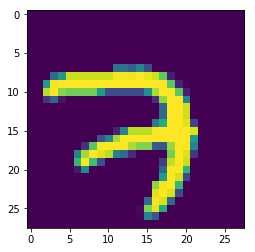

In [72]:
% pylab inline
import matplotlib.pyplot as plt
plt.imshow(sample_image)

In [73]:
 mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [74]:
sample_image2 = mnist.train.images[2].reshape((28,28))

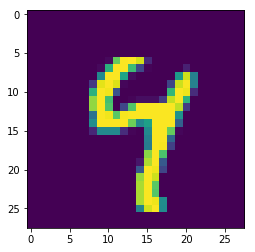

In [75]:

plt.imshow(sample_image2)

In [76]:
mnist.train.labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

### 設定網路參數

In [77]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [78]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [79]:
n_samples

55000

### Placeholders

In [80]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構多層神經網路

In [81]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重(weight)與偏椅(bias)

In [82]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [83]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [84]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

In [86]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化變量

In [87]:
init = tf.global_variables_initializer()

### 訓練模型

In [91]:
Xsamp,ysamp = mnist.train.next_batch(100)

In [92]:
Xsamp.shape

(100, 784)

In [93]:
ysamp.shape

(100, 10)

In [94]:
Xsamp,ysamp = mnist.train.next_batch(1)

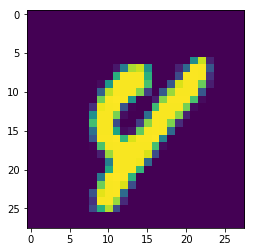

In [98]:
sample_image = Xsamp.reshape((28,28))
plt.imshow(sample_image)

In [100]:
ysamp

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [101]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=161.84878193941978
Epoch: 2 cost=59.435852362892824
Epoch: 3 cost=43.95904717011887
Epoch: 4 cost=35.73470472725953
Epoch: 5 cost=30.44856498284773
Epoch: 6 cost=26.547559214071775
Epoch: 7 cost=23.732803134918207
Epoch: 8 cost=21.218029746792535
Epoch: 9 cost=19.327719931168986
Epoch: 10 cost=17.80927664355798
Epoch: 11 cost=16.41341840787368
Epoch: 12 cost=15.251756375486192
Epoch: 13 cost=14.237391577200468
Epoch: 14 cost=13.272840973192991
Epoch: 15 cost=12.535252796174436
Training Completed in 15 Epochs


### 評估模型

In [102]:
y

<tf.Tensor 'Placeholder_3:0' shape=(?, 10) dtype=float32>

In [103]:
pred

<tf.Tensor 'add_9:0' shape=(?, 10) dtype=float32>

In [104]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [107]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [109]:
correct_predictions = tf.cast(correct_predictions, "float")

In [110]:
accuracy = tf.reduce_mean(correct_predictions)

In [111]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [116]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))
    print(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=162.76337475169805
Epoch: 2 cost=57.91313876585531
Epoch: 3 cost=42.51949708765203
Epoch: 4 cost=34.34520354964514
Epoch: 5 cost=29.01875871051444
Epoch: 6 cost=25.24199668450789
Epoch: 7 cost=22.52503339247268
Epoch: 8 cost=20.186488670219088
Epoch: 9 cost=18.260783553556955
Epoch: 10 cost=16.823822630546317
Epoch: 11 cost=15.52216133637861
Epoch: 12 cost=14.431081318259249
Epoch: 13 cost=13.48172477050261
Epoch: 14 cost=12.669358488402588
Epoch: 15 cost=11.944924016483137
0.9094
Training Completed in 15 Epochs


## TensorBoard
- tensorboard --logdir test

In [117]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [118]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [119]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [120]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [121]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

In [122]:
init = tf.global_variables_initializer()

In [123]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=158.95090235276646
Epoch: 2 cost=58.5943519869718
Epoch: 3 cost=43.212227145108265
Epoch: 4 cost=35.0236564844305
Epoch: 5 cost=29.502816226699142
Epoch: 6 cost=25.77310774239625
Epoch: 7 cost=22.818086974620783
Epoch: 8 cost=20.531594061697596
Epoch: 9 cost=18.61348502267492
Epoch: 10 cost=17.063324065208427
Epoch: 11 cost=15.763942256190573
Epoch: 12 cost=14.624597302458511
Epoch: 13 cost=13.591291717801955
Epoch: 14 cost=12.683902030803933
Epoch: 15 cost=11.987006630626592
Training Completed in 15 Epochs


## 安裝Keras

In [125]:
! pip install keras

distributed 1.21.8 requires msgpack, which is not installed.


## 使用Keras 辨識手寫數字

In [126]:
import keras

Using TensorFlow backend.


In [128]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [148]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [149]:
x_train.shape

(60000, 28, 28)

In [150]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [151]:
x_test.shape

(10000, 28, 28)

In [152]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

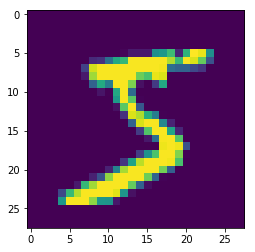

In [154]:
plt.imshow(x_train[0])

In [155]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [156]:
np.max(x_train[0])
np.min(x_train[0])

0

In [157]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [158]:
np.max(x_train[0])
np.min(x_train[0])

0.0

In [159]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [160]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [161]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [163]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 設定網路參數

In [165]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建構神經網路

In [166]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [167]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
## Dense = activation_function(X * Weight + Bias)

### 訓練神經網路

In [168]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 34us/step - loss: 1.0719 - acc: 0.7464 - val_loss: 0.4859 - val_acc: 0.8787
Epoch 2/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.4263 - acc: 0.8860 - val_loss: 0.3538 - val_acc: 0.9043
Epoch 3/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3470 - acc: 0.9028 - val_loss: 0.3064 - val_acc: 0.9158
Epoch 4/15
60000/60000 [==============================] - ETA: 0s - loss: 0.3097 - acc: 0.911 - 2s 32us/step - loss: 0.3093 - acc: 0.9119 - val_loss: 0.2820 - val_acc: 0.9223
Epoch 5/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.2841 - acc: 0.9199 - val_loss: 0.2623 - val_acc: 0.9250
Epoch 6/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.2642 - acc: 0.9251 - val_loss: 0.2460 - val_acc: 0.9306
Epoch 7/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.2478 - ac

In [171]:
predicted = np.argmax(model.predict(x_test), 1)

In [174]:
y = np.argmax(y_test, 1)

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y, predicted)

0.9534

In [176]:
confusion_matrix(y, predicted)

array([[ 970,    0,    1,    1,    0,    3,    3,    1,    1,    0],
       [   0, 1116,    2,    2,    0,    1,    3,    2,    9,    0],
       [   6,    3,  985,    7,    5,    2,    5,    9,    9,    1],
       [   1,    1,    8,  962,    0,   14,    1,    9,   10,    4],
       [   1,    2,    4,    0,  938,    0,    9,    2,    3,   23],
       [   9,    1,    0,   21,    4,  832,   10,    1,    8,    6],
       [  11,    3,    3,    0,    7,    9,  920,    1,    4,    0],
       [   1,    8,   20,    6,    3,    1,    0,  971,    1,   17],
       [   6,    4,    3,   18,    7,    9,   11,   10,  902,    4],
       [   9,    8,    1,   12,   24,    5,    1,    8,    3,  938]],
      dtype=int64)

## 使用者流失分析

### Method 1

In [195]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [198]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [204]:
X = dataset.iloc[:, 3:13]

In [206]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [214]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [207]:
y = dataset.iloc[:, 13]

In [208]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [229]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [230]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [231]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [232]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [233]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [234]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [235]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [236]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X)

In [239]:
X.toarray()[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [241]:
X = X.toarray()[:, 1:]

In [242]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

### Method 2

In [243]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [244]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [253]:
X = pd.concat([pd.get_dummies(X['Geography']), X], axis = 1)

In [255]:
del X['Geography']

In [257]:
del X['France']

In [260]:
X['Gender'] = X['Gender'].map(lambda e: 1 if e== 'Male' else 0 )

In [265]:
X.values.shape

(10000, 11)

In [266]:
y.values

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [267]:
X = X.values
y = y.values

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [269]:
X_train.shape

(8000, 11)

In [270]:
X_test.shape

(2000, 11)

In [271]:
y_train.shape

(8000,)

In [272]:
y_test.shape

(2000,)

In [273]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)


In [276]:
#X_train
#X_test

In [278]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.5585 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.5083 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.5061 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.5059 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.5059 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.5059 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.5059 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.5059 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.5059 - acc: 0.7960
Epoch 10/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.5059 - acc: 0.7960
Epoch 11/

8000/8000 [==============================] - 0s 56us/step - loss: 0.3360 - acc: 0.8625
Epoch 84/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3348 - acc: 0.8626
Epoch 85/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3367 - acc: 0.8631
Epoch 86/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3364 - acc: 0.8625
Epoch 87/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3352 - acc: 0.8602
Epoch 88/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3355 - acc: 0.8620
Epoch 89/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3353 - acc: 0.8616
Epoch 90/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.3349 - acc: 0.8617
Epoch 91/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3361 - acc: 0.8616
Epoch 92/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3349 - acc: 0.8626
Epoch 93/100


In [280]:
y_pred = classifier.predict(X_test)

In [281]:
y_pred = (y_pred > 0.5)


In [282]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [284]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.859

In [285]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 209,  196]], dtype=int64)